# **Lab 2:** Avocado Prices


---



---



### **Data Set-up**
- we’re going to be looking at avocado prices.

0. Import the data and declare your package dependencies.

In [29]:
from pandas import *
from plotnine import *
from numpy import *

avocado_data = read_csv("/Users/shreyachidambaram/Desktop/ML/Machine_Learning_Repository/Week_2_HW/Lab 2/Data/avocado-updated-2020 2.csv")
avocado_data

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


1. Briefly describe the data set. What information does it contain?

#### Avocado Sales Data

- **Date**: The date of the data entry, likely representing when the data was collected or the end of a reporting period.
- **Average Price**: The average price of avocados for that date and location.
- **Total sales (previously Total_Volume)**: The total amount of avocados sold for that date and location.
- **Small Hass sales (previously 4046)**: Total number of Small Hass avocados sold
- **Large Hass sales (previously 4225)**: Total number Volume of Large Hass avocados sold
- **Extra Large Hass salese (previously 4770)**: Total number Volume of Extra Large Hass avocados sold
- **Total Bags**: The total number of bags of avocados sold.
- **Small Bags**: The number of small bags of avocados sold.
- **Large Bags**: The number of large bags of avocados sold.
- **XLarge Bags**: The number of extra-large bags of avocados sold.
- **Type**:
  - **Conventional**: Grown with modern agricultural practices.
  - **Organic**: Grown without synthetic fertilizers or pesticides.
- **Year**: The year of the data entry.
- **Geography**: The location or region where the data was collected. (Locations with a "/" represent metropolitan areas.)






In [30]:
avocado_data.describe()
# I then used the describe function to check the data and see the general statistics of each variable
# only look at numerical variables since the values for categorical are not meanigfull

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,33045.000000,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,33045.000000
mean,1.379941,9.683997e+05,3.023914e+05,2.797693e+05,2.148255e+04,3.646735e+05,2.501980e+05,1.067329e+05,7.742585e+03,2017.460887
std,0.378972,3.934533e+06,1.301026e+06,1.151052e+06,1.001607e+05,1.564004e+06,1.037734e+06,5.167226e+05,4.819803e+04,1.699747
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.511895e+04,7.673100e+02,2.712470e+03,0.000000e+00,9.121860e+03,6.478630e+03,4.662900e+02,0.000000e+00,2016.000000
50%,1.350000,1.291170e+05,1.099477e+04,2.343600e+04,1.780900e+02,5.322224e+04,3.687699e+04,6.375860e+03,0.000000e+00,2017.000000
75%,1.620000,5.058285e+05,1.190219e+05,1.352389e+05,5.096530e+03,1.744314e+05,1.206624e+05,4.041723e+04,8.044400e+02,2019.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.403184e+06,2020.000000


In [31]:
data_types = avocado_data.dtypes
data_types # let's see what the types of each column are
# is a data type is a object(it can be any data type) but in this case they are strings

date              object
average_price    float64
total_volume     float64
4046             float64
4225             float64
4770             float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type              object
year               int64
geography         object
dtype: object

In [32]:
# First let's examine unique entries in the 'geography' column
unique_geographies = avocado_data['geography'].unique()

# Now we can look at all the  unique geographical regions
unique_geographies


array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

Based on the unique geographical entries, we can make some categorizations based on our own assumptions:

**Regions:** 'Total U.S.', 'West', 'South Central', 'Southeast', 'Northeast', 'Midsouth', 'Great Lakes', 'Plains'

**City:** Albany, New york, Altlant etc

**States:** 'California', 'South Carolina'

**Metro :** All other entries such as 'Los Angeles', 'Albany', 'Atlanta', etc. and items with a /

**Country:**  Total U.S

2. Clean the data in any way you see fit.


In [33]:
# Ok so first I want to rename the columns so they have a more meanifull name
column_renames = {
    "total_volume": 'sales',
    "4046": "small_hass_sold",
    "4225": "large_hass_sold",
    "4770": "xlarge_hass_sold"
}
avocado_data = avocado_data.rename(columns=column_renames)

# Displaying the first few rows with renamed columns
avocado_data.head()


,date,average_price,sales,small_hass_sold,large_hass_sold,xlarge_hass_sold,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [34]:
# Extract year, month, and day into separate columns using the delimeter -
avocado_data[["year","month","day"]] = avocado_data["date"].str.split('-', expand= True)
# Display the first few rows of the modified dataset
avocado_data.head()


,date,average_price,sales,small_hass_sold,large_hass_sold,xlarge_hass_sold,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,01,04
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,01,04
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,01,04
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,01,04
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,01,04


In [35]:
# ok so now we are going to create 5 new dictionaries for city, metro, region, state, and country
city = {"Albany": "Albany", "Atlanta": "Atlanta", "Boise": "Boise","Boston": "Boston", "Charlotte": "Charlotte","Chicago": "Chicago",
"Columbus": "Columbus","Denver": "Denver","Detroit": "Detroit","Grand Rapids": "Grand Rapids","Houston": "Houston",
"Indianapolis": "Indianapolis","Jacksonville": "Jacksonville","Las Vegas": "Las Vegas","Los Angeles": "Los Angeles",
"Louisville": "Louisville","Nashville": "Nashville","New York": "New York","Orlando": "Orlando",
"Philadelphia": "Philadelphia","Pittsburgh": "Pittsburgh","Portland": "Portland","Roanoke": "Roanoke","Sacramento": "Sacramento","San Diego": "San Diego",
"San Francisco": "San Francisco","Seattle": "Seattle","Spokane": "Spokane","St. Louis": "St. Louis","Syracuse": "Syracuse","Tampa": "Tampa"}

metro = {"Baltimore/Washington": "Baltimore/Washington","Buffalo/Rochester": "Buffalo/Rochester","Cincinnati/Dayton": "Cincinnati/Dayton",
"Dallas/Ft. Worth": "Dallas/Ft. Worth", "Harrisburg/Scranton": "Harrisburg/Scranton","Hartford/Springfield": "Hartford/Springfield",
"Miami/Ft. Lauderdale": "Miami/Ft. Lauderdale", "New Orleans/Mobile": "New Orleans/Mobile","Phoenix/Tucson": "Phoenix/Tucson",
"Raleigh/Greensboro": "Raleigh/Greensboro","Richmond/Norfolk": "Richmond/Norfolk","West Tex/New Mexico": "West Tex/New Mexico"}

region = {"Great Lakes": "Great Lakes","Midsouth":"Midsouth","Northeast": "Northeast","Northern New England": "Northern New England",
"South Central": "South Central","Southeast": "Southeast","West": "West","Plains": "Plains",}

# I'm assuming california is a state
state = {"California":"California","South Carolina": "South Carolina"}

country = {"Total U.S.": "Total U.S."}



In [38]:
# know we are going to map each value in the dictionary into
# Resource for map function: https://www.w3schools.com/python/ref_func_map.asp
avocado_data['city'] = avocado_data['geography'].map(city)
# The map() method is used to transform the values in the 'geography' column based on the mapping provided by city dictionary
avocado_data['metro'] = avocado_data['geography'].map(metro)
avocado_data['region'] = avocado_data['geography'].map(region)
avocado_data['state'] = avocado_data['geography'].map(state)
avocado_data['country'] = avocado_data['geography'].map(country)

# Now we label the avocado_data to avocado_clean
avocado_clean= avocado_data
avocado_clean

,date,average_price,sales,small_hass_sold,large_hass_sold,xlarge_hass_sold,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day,city,metro,region,state,country
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,01,04,Albany,NaN,NaN,NaN,NaN
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,01,04,Albany,NaN,NaN,NaN,NaN
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,01,04,Atlanta,NaN,NaN,NaN,NaN
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,01,04,Atlanta,NaN,NaN,NaN,NaN
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,01,04,NaN,Baltimore/Washington,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,11,29,NaN,NaN,NaN,NaN,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,11,29,NaN,NaN,West,NaN,NaN
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,11,29,NaN,NaN,West,NaN,NaN
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,11,29,NaN,West Tex/New Mexico,NaN,NaN,NaN


### **Exercises**

3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

Tips:


*   When reading the problem read many times to understand what is being asked
*   Try restaing the problem so you understand
*   What value do you want and what columns are you lookin at



In [39]:
year_org = avocado_clean[(avocado_clean["year"]=="2017") & (avocado_clean["type"]=="organic")]
total_sold_by_region = year_org.groupby('region')['small_hass_sold'].sum()
top_region = total_sold_by_region.sort_values(ascending=False).idxmax() # this makes sure it is in decending order
top_region



'West'

4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [41]:
order= avocado_clean.sort_values(by = ["sales"], ascending=False)

# already split the data refer to above code
month= order.groupby('month')['sales'].mean()
month_highest= month.sort_values(ascending=False).idxmax() # values will be sorted in descending order, so the largest values will appear first.
month_highest
# May is the month with the highest avg volume of avocado sales

'05'

5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [42]:
sales_metro = avocado_clean.groupby('metro')['sales'].sum() # from avocado we are grouping by metro and then we are filtering for sales
highest_avg = sales_metro.sort_values(ascending=False).idxmax() # The idxmax method returns the index
highest_avg


'Dallas/Ft. Worth'

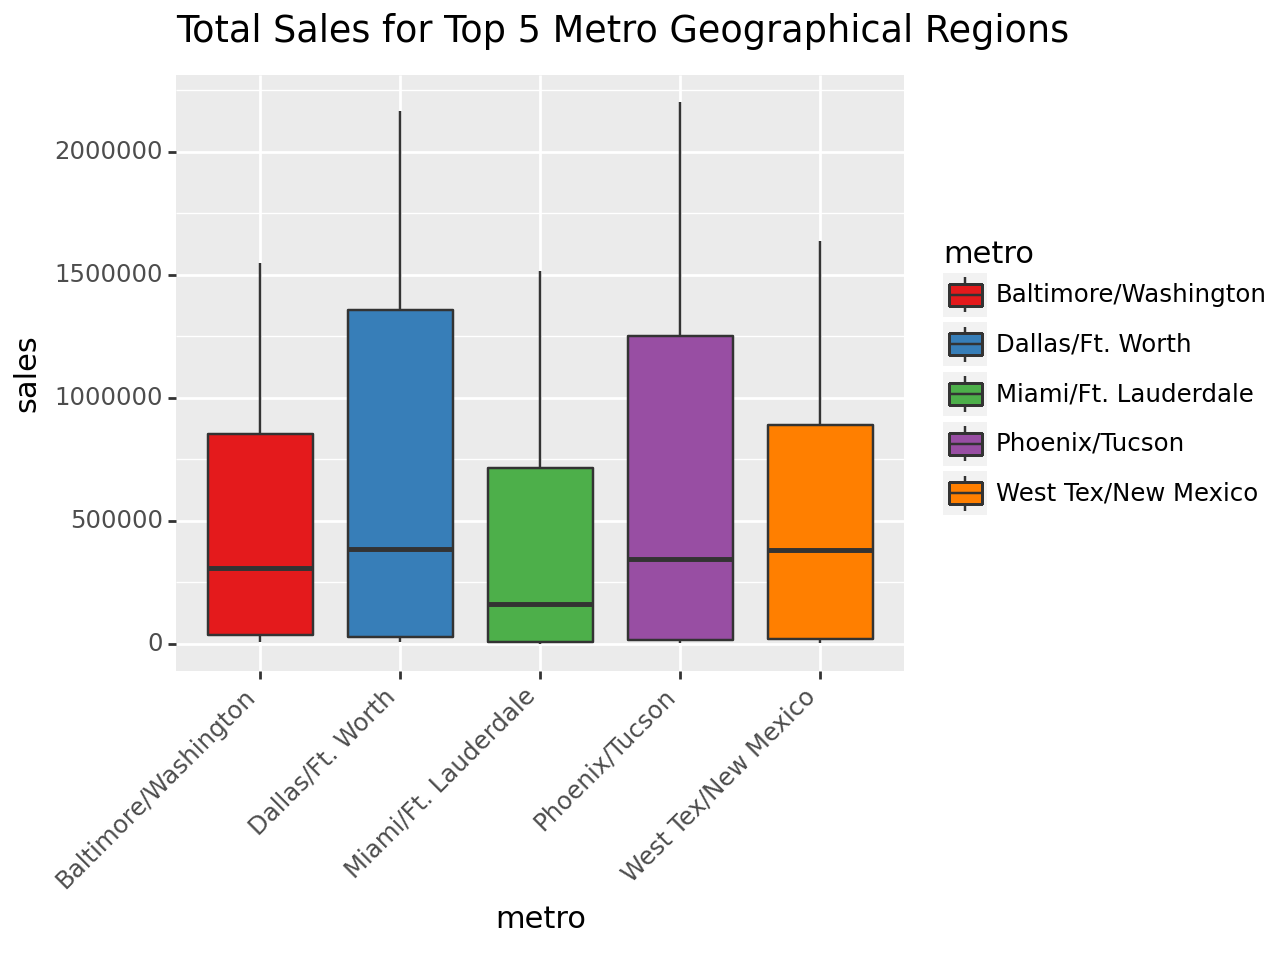

<Figure Size: (640 x 480)>

In [114]:
from plotnine import *

# First sort and select the top 5 metro areas
top5_metros = sales_metro.nlargest(5).index

# Then filter original data to include only top 5 metros
filtered_data = avocado_clean[avocado_clean['metro'].isin(top5_metros)]

plot = (
    ggplot(filtered_data, aes(x='metro', y='sales', fill='metro'))
    + geom_boxplot()
    + ggtitle("Total Sales for Top 5 Metro Geographical Regions")
    + theme(axis_text_x=element_text(angle=45, hjust=1))  # rotate x-axis labels by 45 degrees
    + scale_fill_brewer(type='qual', palette='Set1')  # use a qualitative ColorBrewer palette
)

plot


### **Pivoting**
- The following four California geographical regions are in this data set: "Los Angeles", "San Diego", "Sacramento", and "San Francisco".

6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [43]:
# Filter by the 4 cities in calrifornia
filtered_data = avocado_clean[(avocado_clean["city"].isin(["Los Angeles", "San Diego", "Sacramento", "San Francisco"]))]
filtered_data.head()


,date,average_price,sales,small_hass_sold,large_hass_sold,xlarge_hass_sold,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day,city,metro,region,state,country
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,01,04,Los Angeles,NaN,NaN,NaN,NaN
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,01,04,Los Angeles,NaN,NaN,NaN,NaN
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,01,04,Sacramento,NaN,NaN,NaN,NaN
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,01,04,Sacramento,NaN,NaN,NaN,NaN
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,01,04,San Diego,NaN,NaN,NaN,NaN


7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [44]:
filtered_data1= filtered_data[["average_price","city", "type"]]
filtered_data1
# Pivoting the data
new_table = filtered_data1.pivot_table(index = "city", columns = "type", values = "average_price",aggfunc='mean') #use pivot_table because the data set has duplicated
# Resetting the index
new_table = new_table.reset_index()
# Calculating price differences
new_table["price difference"]=new_table["organic"]-new_table["conventional"]
new_table

wide_city_cal= new_table[['city', 'price difference']]
wide_city_cal

type,city,price difference
0,Los Angeles,0.527778
1,Sacramento,0.578497
2,San Diego,0.684510
3,San Francisco,0.718954


**San Francisco** stands out as the city with the most pronounced price disparity between organic and conventional avocados, exhibiting a significant 0.72 difference. A visual assessment clearly underscores San Francisco's position at the pinnacle, with Los Angeles at the opposite end, showcasing the smallest price gap. Notably, San Francisco's price differential surpasses the average price difference of $0.63.

Furthermore, according to our summary statistics, we see that 75% of the cities have a price difference of up to $0.6931.

Since SF's price difference of $0.72 exceeds this, it is indeed among the top 25% of cities in terms of price difference, and it's actually the highest (since it matches the "max" value).

In [45]:
wide_city_cal["price difference"].describe()

count    4.000000
mean     0.627435
std      0.089368
min      0.527778
25%      0.565817
50%      0.631503
75%      0.693121
max      0.718954
Name: price difference, dtype: float64

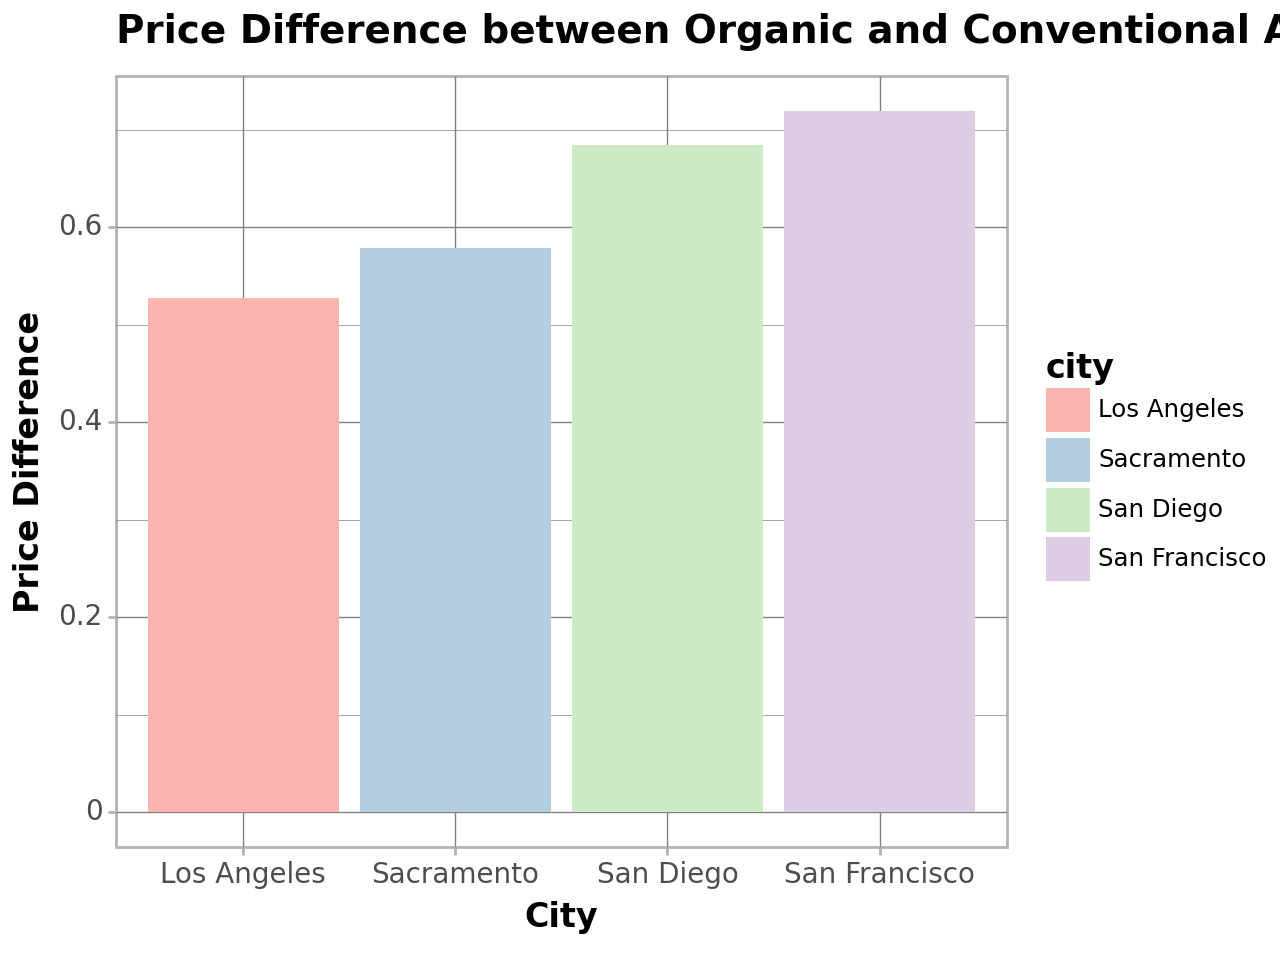

<Figure Size: (640 x 480)>

In [118]:
from plotnine import *

plot = (
    ggplot(wide_city_cal, aes(x='city', y='price difference', fill='city'))
    + geom_bar(stat='identity')# stat identiy data should be used as-is, without any transformations.
    + scale_fill_brewer(type='qual', palette='Pastel1')  # using a pastel color palette
    + labs(title="Price Difference between Organic and Conventional Avocados by City",
           x="City",
           y="Price Difference")
    + theme_light()  # let's use a lighter theme
    + theme(
        axis_title=element_text(size=12, face="bold"),
        axis_text=element_text(size=10),
        title=element_text(size=14, face="bold"),
        legend_title=element_text(size=12),
        legend_position='right',
        panel_grid_major=element_line(color="gray", size=0.5),
        panel_grid_minor=element_line(color="gray", size=0.25)
    )
)

plot



8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

In [46]:
filtered_data

,date,average_price,sales,small_hass_sold,large_hass_sold,xlarge_hass_sold,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day,city,metro,region,state,country
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,01,04,Los Angeles,NaN,NaN,NaN,NaN
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,01,04,Los Angeles,NaN,NaN,NaN,NaN
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,01,04,Sacramento,NaN,NaN,NaN,NaN
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,01,04,Sacramento,NaN,NaN,NaN,NaN
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,01,04,San Diego,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23531.38,3303.69,2057.03,0.00,18170.66,18144.54,26.12,0.00,organic,2020,Sacramento,11,29,Sacramento,NaN,NaN,NaN,NaN
33019,2020-11-29,1.12,469356.72,104509.99,19988.45,7210.47,337647.81,189341.36,127701.64,20604.81,conventional,2020,San Diego,11,29,San Diego,NaN,NaN,NaN,NaN
33020,2020-11-29,1.95,25799.95,894.63,838.11,0.00,24067.21,9691.46,14375.75,0.00,organic,2020,San Diego,11,29,San Diego,NaN,NaN,NaN,NaN
33021,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,conventional,2020,San Francisco,11,29,San Francisco,NaN,NaN,NaN,NaN


In [47]:
# I'm calculating total sales volume
filtered_data["total_volume"] = filtered_data["small_hass_sold"] + filtered_data["large_hass_sold"] + filtered_data["xlarge_hass_sold"]

# Here I'm calculating the proportions
filtered_data["small_proportion"] = filtered_data["small_hass_sold"] / filtered_data["total_volume"]
filtered_data["large_proportion"] = filtered_data["large_hass_sold"] / filtered_data["total_volume"]
filtered_data["xlarge_proportion"] = filtered_data["xlarge_hass_sold"] / filtered_data["total_volume"]

# I melt the dataframe to long format
filtered_data_melted = filtered_data.melt(id_vars=["city", "type"], # Resoruce for melt: https://pandas.pydata.org/docs/reference/api/pandas.melt.html
                    value_vars=["small_proportion", "large_proportion", "xlarge_proportion"],
                    var_name="size", value_name="proportion")

# Replacing size column values with appropriate names
filtered_data_melted["size"] = filtered_data_melted["size"].str.replace("_proportion", "").str.capitalize()

# Lastly convert proportion values to percentages
filtered_data_melted["proportion"] = filtered_data_melted["proportion"] * 100
filtered_data_melted


/var/folders/3l/j65l_1d16xj1p4yrh_8vzs_r0000gn/T/ipykernel_10993/1436467774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/3l/j65l_1d16xj1p4yrh_8vzs_r0000gn/T/ipykernel_10993/1436467774.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/3l/j65l_1d16xj1p4yrh_8vzs_r0000gn/T/ipykernel_10993/1436467774.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,city,type,size,proportion
0,Los Angeles,conventional,Small,75.742080
1,Los Angeles,organic,Small,96.514505
2,Sacramento,conventional,Small,28.343839
3,Sacramento,organic,Small,46.275624
4,San Diego,conventional,Small,57.480816
...,...,...,...,...
7339,Sacramento,organic,Xlarge,0.000000
7340,San Diego,conventional,Xlarge,5.474550
7341,San Diego,organic,Xlarge,0.000000
7342,San Francisco,conventional,Xlarge,2.066376


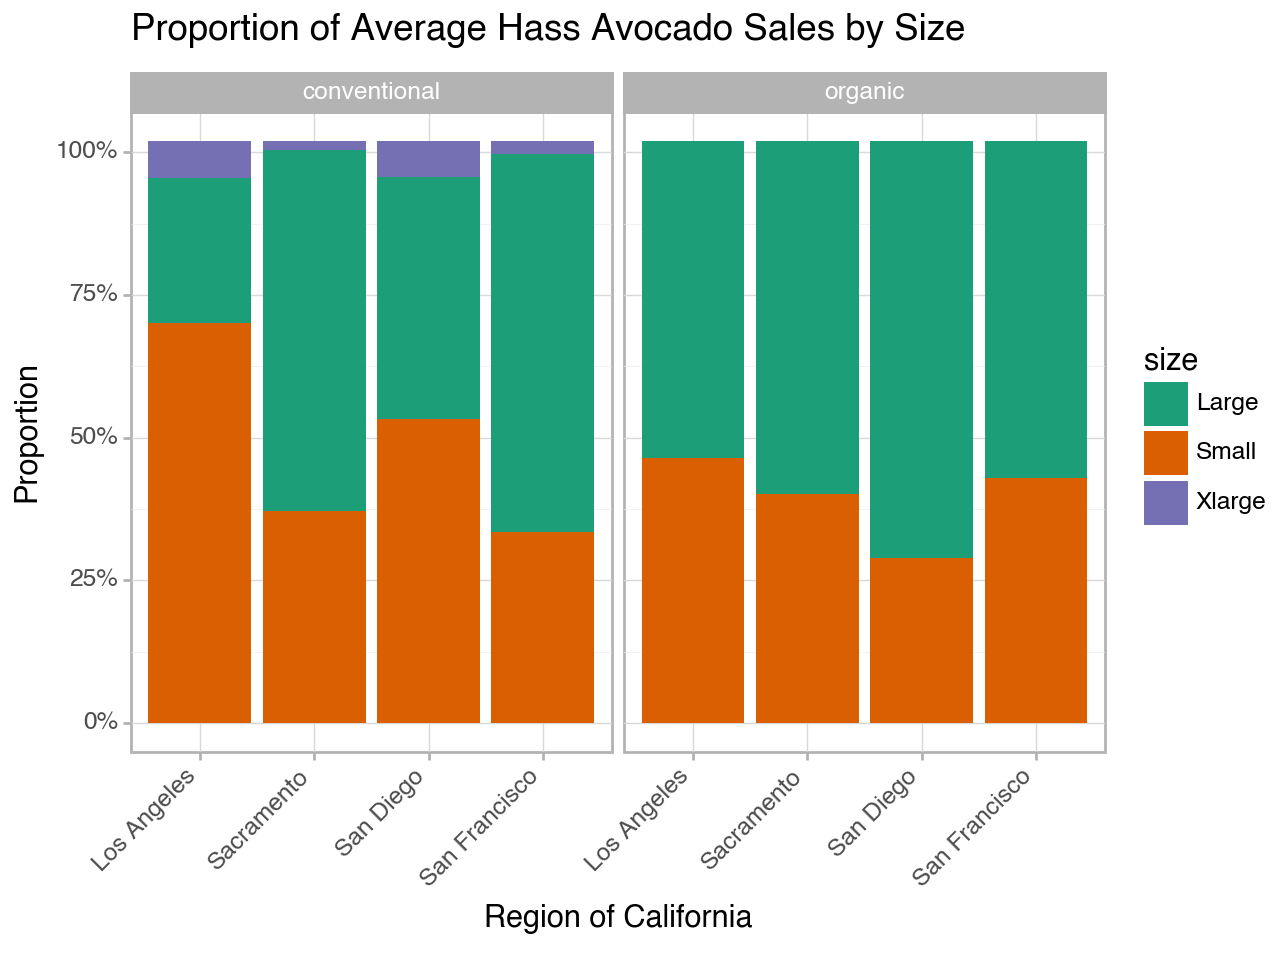

<Figure Size: (640 x 480)>

In [48]:
# colors from canva: large: #1C9E78 small:#D95F01 xlarge: #7570B3
from plotnine import *

plot = (
    ggplot(filtered_data_melted, aes(x='city', y='proportion', fill='size')) +
    geom_bar(aes(group='type'), stat='identity', position='stack') +
    facet_wrap('~ type', nrow=1) +
    labs(title="Proportion of Average Hass Avocado Sales by Size",
         x="Region of California",
         y="Proportion")
    + scale_y_continuous(
        breaks=[0, 7500, 15000, 22500, 30000],
        labels=["0%", "25%", "50%", "75%", "100%"]) +
    scale_fill_manual(values={'Small':'#D95F01','Large':'#1C9E78','Xlarge':'#7570B3'}) +
    theme_light() +
    theme(axis_text_x=element_text(angle=45, hjust=1))
)

plot

### **Using Outside Data**

**Argument:**

When analyzing the interplay between house prices and avocado sales, a distinct trend emerges. According to our visuals, many of the data points are centered around $500k, which might be the average price range avocado companies should target. However, things get interesting when we look at which regions have the highest avocado sales.

Los Angeles, despite its diverse housing costs, consistently sees high avocado sales. This suggests a steady love for the fruit in LA, a city known for its health-conscious residents. It's no surprise, given that LA is where avocado toast gained its fame.

San Diego, with its mid-range house prices, has a wide range of avocado sales, pointing to other influencing factors at play. While some cities show a clear correlation between house prices and avocado sales, the relationship isn't consistent everywhere. This underscores the need to grasp local dynamics to ensure our conclusions are grounded in reality.



In [49]:
# I want to check how many values of the 4 regions there are so I can create my data set
city_counts = avocado_data['city'].value_counts()

# Extract counts for specific cities
los_angeles_count = city_counts.get('Los Angeles', 0)
sacramento_count = city_counts.get('Sacramento', 0)
san_diego_count = city_counts.get('San Diego', 0)
san_francisco_count = city_counts.get('San Francisco', 0)

# print with text so it looks nice and pretty and we can read it
print(f"Los Angeles: {los_angeles_count}")
print(f"Sacramento: {sacramento_count}")
print(f"San Diego: {san_diego_count}")
print(f"San Francisco: {san_francisco_count}")

Los Angeles: 612
Sacramento: 612
San Diego: 612
San Francisco: 612


For my made up data set I'm going to assume:
Los Angeles: Starting at $500k with a 5% yearly increase.

Sacramento: Starting at $400k with a 4% yearly increase.

San Diego: Starting at $550k with a 5.5% yearly increase.

San Francisco: Starting at $800k with a 6% yearly increase.

Resource: I use chat GPT to create a csv file

In [50]:
informed_house_price = read_csv("/Users/shreyachidambaram/Desktop/ML/Machine_Learning_Repository/Week_2_HW/Lab 2/Data/nformed_house_price.csv")
informed_house_price
# I'm checking how my data looks

,city,house_price,year
0,Los Angeles,493727.0059,2015
1,Los Angeles,522535.7153,2016
2,Los Angeles,511599.6971,2017
3,Los Angeles,504932.9242,2018
4,Los Angeles,482800.9320,2019
5,Los Angeles,482799.7260,2020
6,Sacramento,382323.3445,2015
7,Sacramento,414647.0458,2016
8,Sacramento,404044.6005,2017
9,Sacramento,408322.9031,2018


In [51]:
avocado_clean.head()
# I'm checking again how avocado_clean looks

,date,average_price,sales,small_hass_sold,large_hass_sold,xlarge_hass_sold,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day,city,metro,region,state,country
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,01,04,Albany,NaN,NaN,NaN,NaN
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,01,04,Albany,NaN,NaN,NaN,NaN
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,01,04,Atlanta,NaN,NaN,NaN,NaN
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,01,04,Atlanta,NaN,NaN,NaN,NaN
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,01,04,NaN,Baltimore/Washington,NaN,NaN,NaN


In [52]:
# I was getting errors so we need to check if data is in right type
avocado_clean['year'] = avocado_clean['year'].astype(int)
informed_house_price['year'] = informed_house_price['year'].astype(int)

# use a left join because we want all the vlaues in the avocado_clean data set
merged_data = avocado_clean.merge(informed_house_price, on=['city', 'year'], how='left')
merged_data.head()


,date,average_price,sales,small_hass_sold,large_hass_sold,xlarge_hass_sold,total_bags,small_bags,large_bags,xlarge_bags,...,year,geography,month,day,city,metro,region,state,country,house_price
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,...,2015,Albany,01,04,Albany,NaN,NaN,NaN,NaN,NaN
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,...,2015,Albany,01,04,Albany,NaN,NaN,NaN,NaN,NaN
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,...,2015,Atlanta,01,04,Atlanta,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,...,2015,Atlanta,01,04,Atlanta,NaN,NaN,NaN,NaN,NaN
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,...,2015,Baltimore/Washington,01,04,NaN,Baltimore/Washington,NaN,NaN,NaN,NaN


In [53]:
# Filter data for the specified cities
cities = ['Sacramento', 'Los Angeles', 'San Francisco', 'San Diego']
filtered_data = merged_data[merged_data['city'].isin(cities)]
filtered_data


,date,average_price,sales,small_hass_sold,large_hass_sold,xlarge_hass_sold,total_bags,small_bags,large_bags,xlarge_bags,...,year,geography,month,day,city,metro,region,state,country,house_price
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,...,2015,Los Angeles,01,04,Los Angeles,NaN,NaN,NaN,NaN,493727.0059
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,...,2015,Los Angeles,01,04,Los Angeles,NaN,NaN,NaN,NaN,493727.0059
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,...,2015,Sacramento,01,04,Sacramento,NaN,NaN,NaN,NaN,382323.3445
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,...,2015,Sacramento,01,04,Sacramento,NaN,NaN,NaN,NaN,382323.3445
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,...,2015,San Diego,01,04,San Diego,NaN,NaN,NaN,NaN,568284.3452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23531.38,3303.69,2057.03,0.00,18170.66,18144.54,26.12,0.00,...,2020,Sacramento,11,29,Sacramento,NaN,NaN,NaN,NaN,418796.3941
33019,2020-11-29,1.12,469356.72,104509.99,19988.45,7210.47,337647.81,189341.36,127701.64,20604.81,...,2020,San Diego,11,29,San Diego,NaN,NaN,NaN,NaN,551361.6037
33020,2020-11-29,1.95,25799.95,894.63,838.11,0.00,24067.21,9691.46,14375.75,0.00,...,2020,San Diego,11,29,San Diego,NaN,NaN,NaN,NaN,551361.6037
33021,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,...,2020,San Francisco,11,29,San Francisco,NaN,NaN,NaN,NaN,789308.9475


In [54]:
filtered_data= filtered_data[["city","sales","house_price"]]
filtered_data

,city,sales,house_price
44,Los Angeles,2682159.95,493727.0059
45,Los Angeles,54495.54,493727.0059
80,Sacramento,430138.88,382323.3445
81,Sacramento,9213.49,382323.3445
82,San Diego,461607.33,568284.3452
...,...,...,...
33018,Sacramento,23531.38,418796.3941
33019,San Diego,469356.72,551361.6037
33020,San Diego,25799.95,551361.6037
33021,San Francisco,644141.37,789308.9475


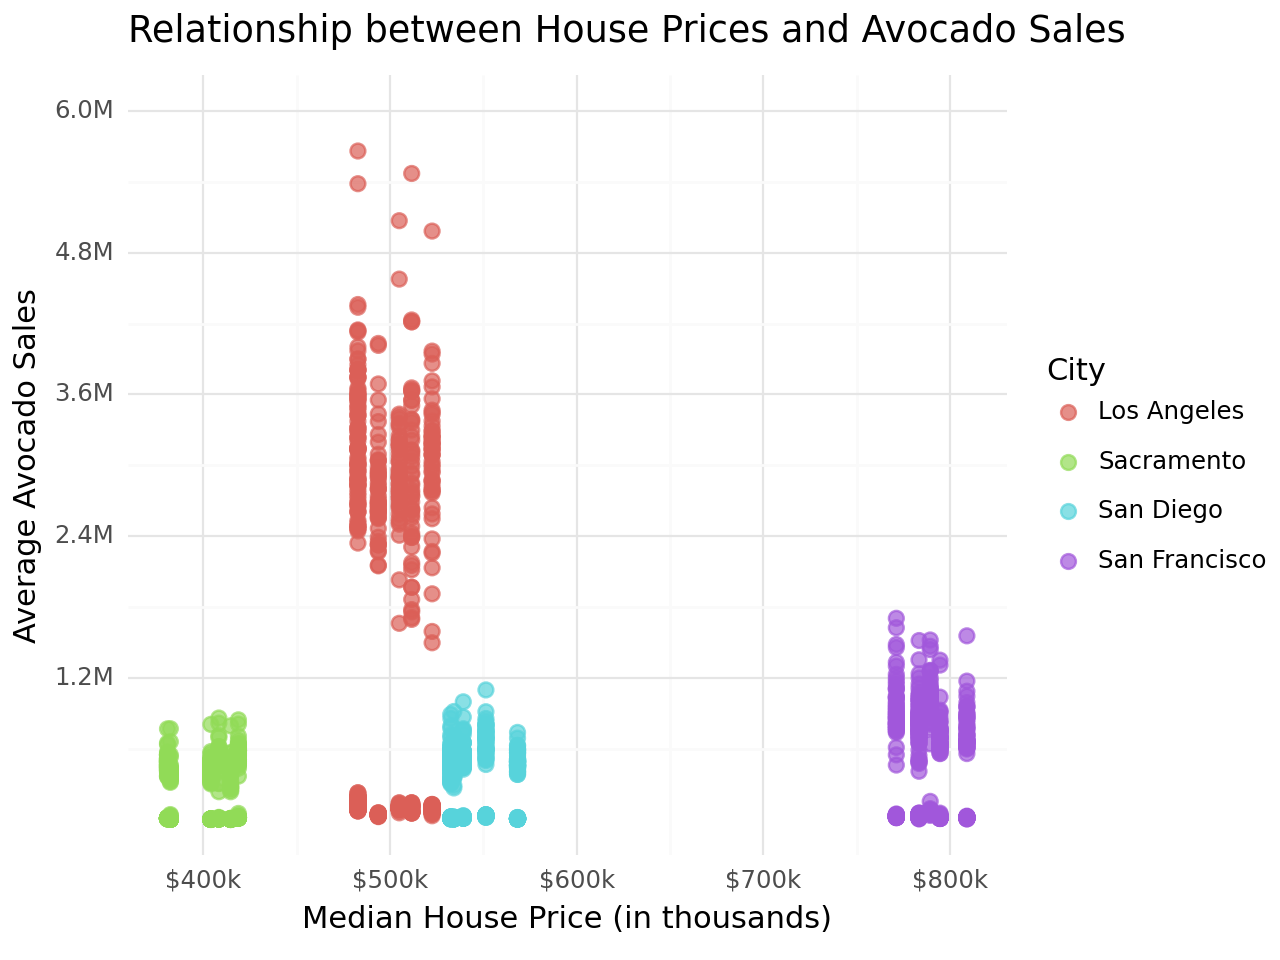

<Figure Size: (640 x 480)>

In [145]:

# boxplot
p = (
    ggplot(filtered_data, aes(x='house_price', y='sales', color='city'))
    + geom_point(alpha=0.7, size=2.5)
    + theme_minimal()
    + labs(title="Relationship between House Prices and Avocado Sales",
           x="Median House Price (in thousands)",
           y="Average Avocado Sales")
    + scale_color_discrete(name="City")
    + theme(legend_position="right")
    + scale_x_continuous(labels=lambda l: ['${:,.0f}k'.format(x/1000) for x in l])  # Display x-axis in thousands
    + scale_y_continuous(limits=(0, 6000000),
                         breaks=range(1200000, 6500000, 1200000),
                         labels=['1.2M', '2.4M', '3.6M', '4.8M', '6.0M'])
)

p

